# Series temporales

**R** cuenta con numerosas funciones para el análisis de series temporales en esta lección aprenderemos las funciones y estructuras de datos más básicas para su manejo.


## El formato de fecha

Normalmente cuando cargamos un fichero, el formato de la(s) columna(s) que representan fechas será del tipo carácter (`chr`). Esto significa que **R** lo interpreta como letras y números en lugar de fechas que contienen un valor secuencial.

Por este motivo, será necesario convertir las columnas que representan fechas, normalmente almacenadas como _strings_ en un tipo de datos que se pueda mostrar como una variable continua. Como es de esperar, **R** tiene un tipo de datos para representar fechas, podemos realizar esta conversión usando la función `as.Date()`.

Cuando ejecutamos la función `as.Date()`, debemos decirle a **R** cómo se formatea la fecha: la posición del mes, el día y el año y en qué formato se encuentra cada elemento.

Por ejemplo: 1/11/10 _vs_ 11-1-2010 representan la misma fecha, pero tienen diferente formato. Podemos usar las siguientes designaciones para los componentes de los datos de fecha y hora:

- %Y : Año expresado con 4 dígitos.
- %y : Año expresado con 2 dígitos.
- %m : Mes.
- %d - Día.

Si queremos expresar las fechas anteriores con un *string* que especifica el formato lo haríamos de la siguiente manera:

- 1/11/10 : "%d/%m/%y"
- 11-1-2010 : "%m/%d/%Y"


Veamos un ejemplo de transformación de fecha del tipo de datos *string* a fecha, usaremos la función antes mencionada y el parámetro `format` para especificar el formato.

In [3]:
fecha_str = "1/11/10"
fecha = as.Date(fecha_str, format="%d/%m/%y")
fecha

[1] "2010-11-01"

Esta operación también es aplicable a vectores enteros, de esta manera podemos transformar columnas enteras de nuestros _dataframes_.


## La estructura de datos `ts`

El uso de funciones para el análisis de series temporales requiere que los objetos a los que se aplican sean de la clase ts (time series). La función `ts()` convierte un objeto, por ejemplo un vector, al tipo de datos serie temporal.

Vamos a usar el conjunto de datos _Daily climate data in the city of Delhi from 2013 to 2017_ que podemos encontrar en la plataforma Kaggle ([enlace](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv)). veremos que existen 2 ficheros, nosotros usaremos aquel llamado: _DailyDelhiClimateTrain.csv_.

Vamos a cargarlo:

In [ ]:
datos = read.csv("data/DailyDelhiClimateTrain.csv")
str(datos)

Como podemos observar la columna `date

Como podemos observar la columna `date` tiene el tipo de datos `chr`. El primer paso que realizaremos es transformarlo a tipo fecha y a continuación usaremos la libreria `ggplot2` para realizar una primera visualización de los datos, en concreto un diagrama de barras de la temperatura media según el dia.

In [ ]:
datos$date = as.Date(datos$date, format="%Y-%d-%m")

tail(datos)

In [ ]:
library(ggplot2)

ggplot(datos) +  geom_col(mapping=aes(x=date, y=meantemp),fill = "coral") # geom_col es un nuevo tipo de geom

El siguiente paso que realizaremos será el de construir un objeto del tipo `ts` que nos permitirá trabajar de forma más específica con los datos de temperatura media. Necesitaremos especificar la frecuencia de las observaciones y si queremos mantener la información de fechas, también la fecha inicial. 

Veamos un ejemplo:

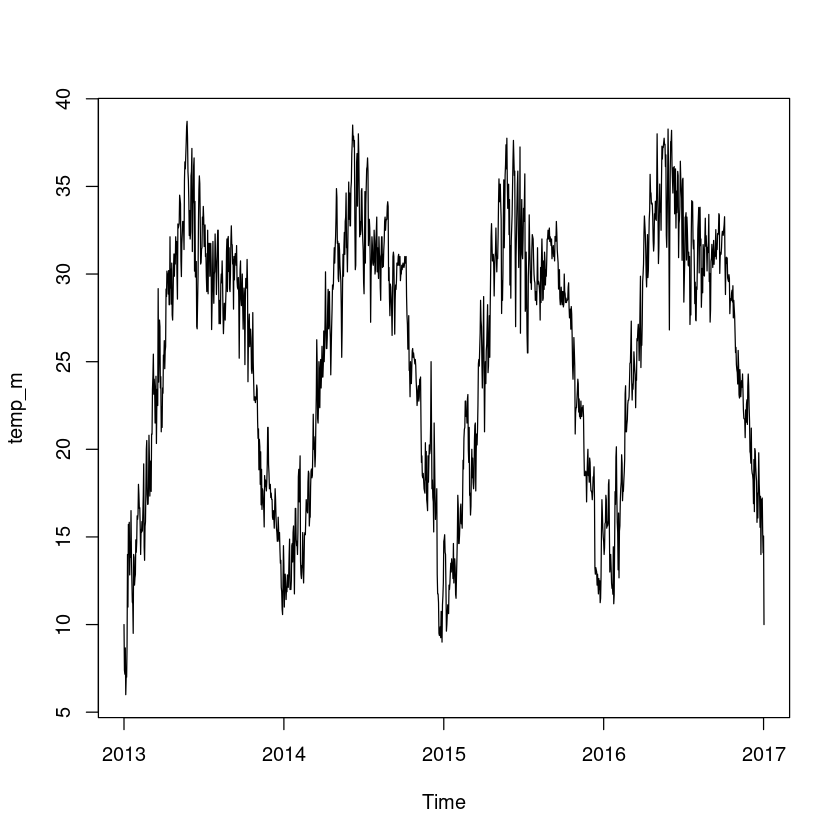

In [40]:
temp_m = ts(datos$meantemp, frequency=365,  start = c(2013, 1))

plot(temp_m)

Cuando tenemos la estructura correctamente creada, podemos usar diferentes funciones que nos permitiran obtener información de la serie:

- **start**: proporciona el inicio de la serie temporal.
- **end**: proporciona el final de la serie temporal.


In [42]:
start(temp_m)
end(temp_m)

[1] 2013    1

[1] 2017    2

- **decompose**: devuelve una lista como resultado, donde las estimaciones del componente estacional, el componente de tendencia y el componente irregular se almacenan en elementos de la lista, denominados "seasonal", "trend", y "random" respectivamente.

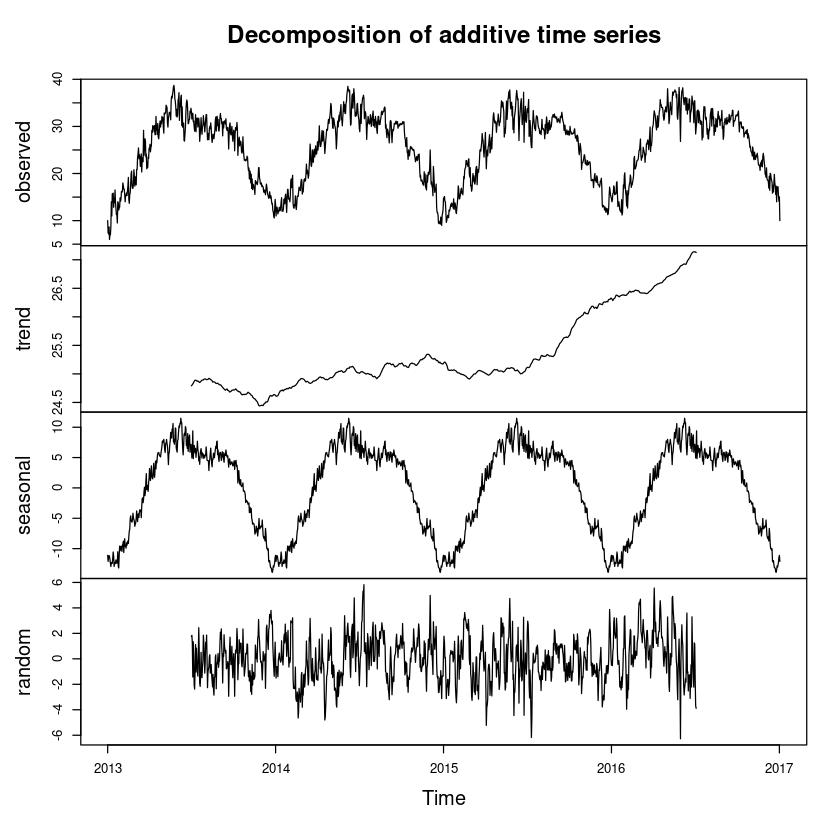

In [43]:
decomp_temp = decompose(temp_m)

plot(decomp_temp)

Otras funciones que pueden ser de interés: 

- **window**: extrae los valores de la serie temporal comprendidos entre una fecha de inicio y otra final. Podemos especificar sólo el año.

- **ts.union()**: junta dos series temporales, rellenando con `NA` los periodos en que una serie sea más larga que la otra.

- **intersect.ts()**: junta dos series temporales, pero sólo con los datos correspondientes al periodo común a ambas.

## Ejercicios

1. Descargar los datos "Dades COVID-19 Casos Confirmats Illes Balears (Per Municipis)" de la página del [Govern Balear](https://catalegdades.caib.cat/es/browse?category=Salut).
2. Cargarlos en **R** y verificar que los formatos de datos son correctos, realizar las transformaciones necesarias.
3. Realizar las operaciones necesarias para obtener un nuevo _dataframe_ donde tengamos los casos por día.
4. Dibujar un diagrama de barras donde se visualice la evolución temporal de los positivos.
5. Crear un objeto `ts` con los datos que has construido. Realiza el plot del año 2021 para asegurarte que el objeto tiene la información correcta.



## Recursos

- Forecasting: Principles and Practice ([enlace](https://otexts.com/fpp3/)): Libro muy completo.

- La clase ts: ([enlace](https://estadistica-dma.ulpgc.es/cursoR4ULPGC/14-seriesTemporales.html#la_clase_ts)) Tutorial básico con algunos ejemplos (en castellano).